<a href="https://colab.research.google.com/github/manjeetsrivastava/play-store-app-reveiw-analysis/blob/main/main_google_play_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mp
                            


In [3]:
# load google app review data into dataframe
df = pd.read_csv("/content/Play Store Data.csv")
dfr = pd.read_csv('/content/User Reviews.csv')


In [ ]:
# df.head() will provide us with first five recods of the given data i.e,index(0-4)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# df.tail() provide us five records data from end 
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Quick information about the google app review data about non null count and data type in column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# it gives data about count, mean  
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# look for the random 10 records
df.sample(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5598,Maleficent Free Fall,FAMILY,4.4,450013,37M,"10,000,000+",Free,0,Everyone,Puzzle,"July 11, 2018",5.9.0,4.2 and up
8113,Cy's Elma Pharmacy,HEALTH_AND_FITNESS,NaN,0,9.4M,10+,Free,0,Everyone 10+,Health & Fitness,"June 28, 2018",7.4.8,4.0.3 and up
1886,Temple Run 2,GAME,4.3,8119151,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
10185,LEADS FA,FINANCE,NaN,31,14M,"1,000+",Free,0,Everyone,Finance,"October 17, 2017",1.0,4.1 and up
7857,CT Scan Viewer 3D,MEDICAL,4.2,6,29M,"1,000+",Free,0,Everyone,Medical,"June 20, 2018",1.0,2.3 and up
9410,EI HabitTracker,FAMILY,NaN,2,981k,100+,Free,0,Everyone,Education,"August 17, 2017",1.40.170809,4.0.3 and up
680,Live Talk - Free Text and Video Chat,DATING,4.6,185,5.0M,"10,000+",Free,0,Mature 17+,Dating,"July 16, 2018",8.2,4.0.3 and up
1313,Fitbit Coach,HEALTH_AND_FITNESS,4.6,28951,60M,"1,000,000+",Free,0,Everyone,Health & Fitness,"July 16, 2018",4.4,4.4 and up
3930,Flow Free,FAMILY,4.3,1295293,11M,"100,000,000+",Free,0,Everyone,Puzzle,"April 11, 2018",4.0,4.1 and up
10594,FL Racing Manager 2018 Pro,SPORTS,4.3,340,15M,"5,000+",Paid,$1.99,Everyone,Sports,"March 17, 2018",1.18,3.0 and up


In [8]:
# for finding what are the types of Category
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
# this gives us about the type of apps available on google apps 
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
# for finding the  type of content rating
df['Content Rating'].unique()

In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [11]:
df['Rating'].mode()


0    4.4
dtype: float64

In [12]:
df['Rating'].median()

4.3

In [13]:

# data cleaning of size columm

val = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=val)


sizes = [i for i in df['Size']]

cleaned_data=[]
def fix_size(sizes_list):
 for size in sizes_list:

    if 'M' in size:

      size=size.replace('M','')
      size = float(size)

    elif 'k' in size:
      size=size.replace('k','')
      size = float(size)
      size = size/1024



    elif  'Varies with device' in size:
      size=float(0) 

    cleaned_data.append(size)  
 return cleaned_data
df['Size'] = fix_size(sizes)
df['Size'] = df['Size'].astype(float)
       



In [14]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [15]:
# Review data cleaning
rev= [i for i in df['Reviews']]

def fix_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for rev in reviews_list:
        if 'M' in rev:
            rev = rev.replace('M', '')
            rev = float(rev) * 1000000  # 1M = 1,000,000
        cleaned_data.append(rev)
    return cleaned_data

df['Reviews'] = fix_reviews(rev)
df['Reviews'] = df['Reviews'].astype(float)


In [16]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [17]:
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
# cleaning of price
price = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(price)
df['Price'] = df['Price'].astype(float)


In [19]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5323,Al Quran Indonesia,BOOKS_AND_REFERENCE,4.8,445756.0,16.000000,"10,000,000+",Free,0.00,Everyone,Books & Reference,"May 15, 2018",2.6.22,4.0 and up
8020,DC All Access,FAMILY,4.4,12639.0,96.000000,"500,000+",Free,0.00,Teen,Entertainment,"October 17, 2017",3.5,4.1 and up
7009,Rized ‼️ Color By Number & Pixel Coloring Book,FAMILY,3.0,1279.0,13.000000,"100,000+",Free,0.00,Everyone,Casual,"June 13, 2018",1.1.7,4.3 and up
3931,Like A Boss,FAMILY,4.4,17069.0,94.000000,"500,000+",Free,0.00,Everyone 10+,Role Playing,"August 1, 2018",1.0.17.2,5.0 and up
3489,Samsung Notes,PRODUCTIVITY,3.9,15368.0,0.000000,"100,000,000+",Free,0.00,Everyone,Productivity,"January 22, 2018",Varies with device,Varies with device
4378,N Launcher: Nougat Theme,PERSONALIZATION,4.2,128.0,7.700000,"10,000+",Free,0.00,Everyone,Personalization,"June 13, 2017",1.0,4.1 and up
1670,Clash of Clans,GAME,4.6,44891723.0,98.000000,"100,000,000+",Free,0.00,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
2264,Calcium Pro,MEDICAL,3.4,77.0,9.900000,"5,000+",Paid,2.99,Everyone,Medical,"April 18, 2017",1.6.2,4.0.3 and up
6943,Bixby Button Remapper - bxActions Pro / Coffee,TOOLS,3.9,319.0,0.024414,"10,000+",Paid,2.99,Everyone,Tools,"April 28, 2017",1.00,7.0 and up
2769,Poshmark - Buy & Sell Fashion,SHOPPING,4.3,46153.0,17.000000,"10,000,000+",Free,0.00,Everyone,Shopping,"August 4, 2018",2.124.01,4.4 and up


In [20]:
#cleaning of Install data 

installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [101]:
total1=  df.groupby("Category")['Type'].agg("count").reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


CLEANING OF DATASETS


In [22]:
# Remove the record where "Type" is null:
index= df[df['Type'].isna()].index

df.drop(axis = 0, inplace = True,index=index)


In [23]:
# REMOVE THE RECORD WHERE "TYPE" IS "O" BY USING DROP FUNCTION
for x in df.index:
  if df.loc[x, "Type"] == "0":
    df.drop(x, inplace = True)

  

In [24]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [25]:
# check for null values , isna() detects missing values and return boolean values
df.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [26]:
df["Rating"].fillna(4.1,inplace = True)


In [99]:
#df.drop(axis =0,index =10472 ,inplace=True)

In [28]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
df.dropna(subset = ['Content Rating'], inplace = True)

In [30]:
print(df['Content Rating'].agg('count'))

10839


In [31]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


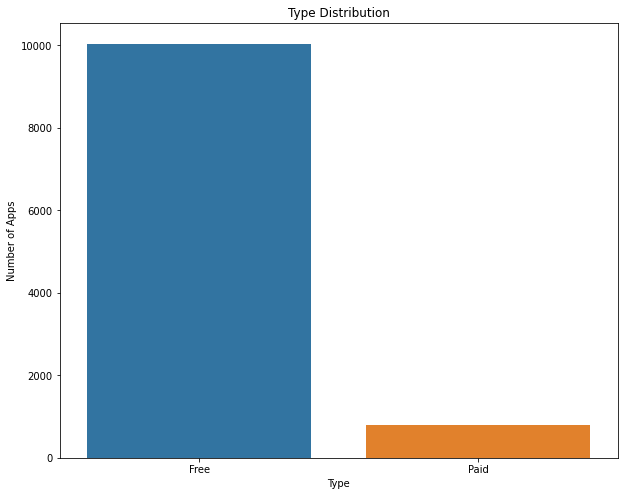

In [32]:
# application type distribution
plt.figure(figsize=(10, 8))
sns.countplot(df['Type'])

plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

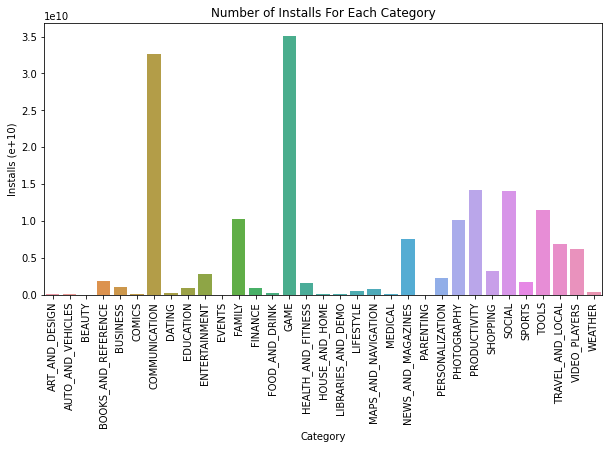

In [33]:
# get the number of installs for each category
categories = df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index () # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

In [34]:

df2 = pd.DataFrame().assign(Category=df['Category'], Type = df['Type'],Installs=df['Installs'])
print(df2)

                  Category  Type    Installs
0           ART_AND_DESIGN  Free     10000.0
1           ART_AND_DESIGN  Free    500000.0
2           ART_AND_DESIGN  Free   5000000.0
3           ART_AND_DESIGN  Free  50000000.0
4           ART_AND_DESIGN  Free    100000.0
...                    ...   ...         ...
10836               FAMILY  Free      5000.0
10837               FAMILY  Free       100.0
10838              MEDICAL  Free      1000.0
10839  BOOKS_AND_REFERENCE  Free      1000.0
10840            LIFESTYLE  Free  10000000.0

[10839 rows x 3 columns]


In [87]:
total1=  df.groupby("Category")['Type' ].count().reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


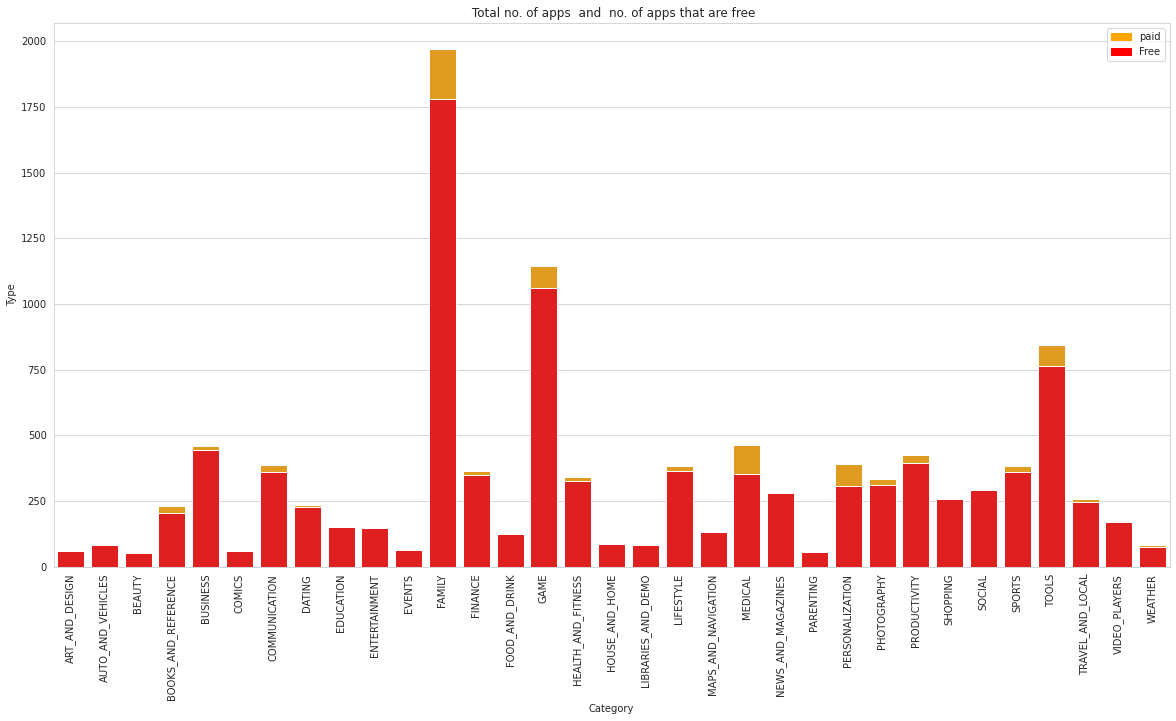

In [163]:
sns.set_style("whitegrid")
total=  df.groupby("Category")['Type'].count().reset_index()
plt.figure(figsize = (20,10))
plt.xticks(rotation =90)

# plot chart for the total apps
sns.set_color_codes('pastel')
c1 = sns.barplot(x = "Category", y = "Type",data = total,color = 'orange')

# create a new data frame for paid 

free_apps = df[df.Type == 'Free']
free = free_apps.groupby('Category').count().reset_index()

# bargraph for free apss
c2 = sns.barplot(x = "Category", y = "Type",data = free,color = 'red')
plt.title(" Total no. of apps  and  no. of apps that are free")

#ADD LEGEND
top = mp.Patch(color = "orange", label = "paid")
bot = mp.Patch(color = "red" , label = "Free")
plt.legend(handles = [top, bot])



In [117]:
free_apps = df[df.Type == 'Free']
free =free_apps.groupby('Category').count()['App'].sort_values(ascending = False)


Category
FAMILY                 1780
GAME                   1061
TOOLS                   765
BUSINESS                446
PRODUCTIVITY            396
LIFESTYLE               363
SPORTS                  360
COMMUNICATION           360
MEDICAL                 354
FINANCE                 349
HEALTH_AND_FITNESS      325
PHOTOGRAPHY             313
PERSONALIZATION         309
SOCIAL                  292
NEWS_AND_MAGAZINES      281
SHOPPING                258
TRAVEL_AND_LOCAL        246
DATING                  227
BOOKS_AND_REFERENCE     203
VIDEO_PLAYERS           171
EDUCATION               152
ENTERTAINMENT           147
MAPS_AND_NAVIGATION     132
FOOD_AND_DRINK          125
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        82
WEATHER                  74
EVENTS                   63
ART_AND_DESIGN           62
COMICS                   60
PARENTING                58
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
df4 = pd.DataFrame().assign(Rating=df['Rating'],Installs=df['Installs'])
print(df4)

       Rating    Installs
0         4.1     10000.0
1         3.9    500000.0
2         4.7   5000000.0
3         4.5  50000000.0
4         4.3    100000.0
...       ...         ...
10836     4.5      5000.0
10837     5.0       100.0
10838     4.1      1000.0
10839     4.5      1000.0
10840     4.5  10000000.0

[10839 rows x 2 columns]


**5**. **TOTAL NUMBER OF APPLICATIONS IN EACH CATEGORY**

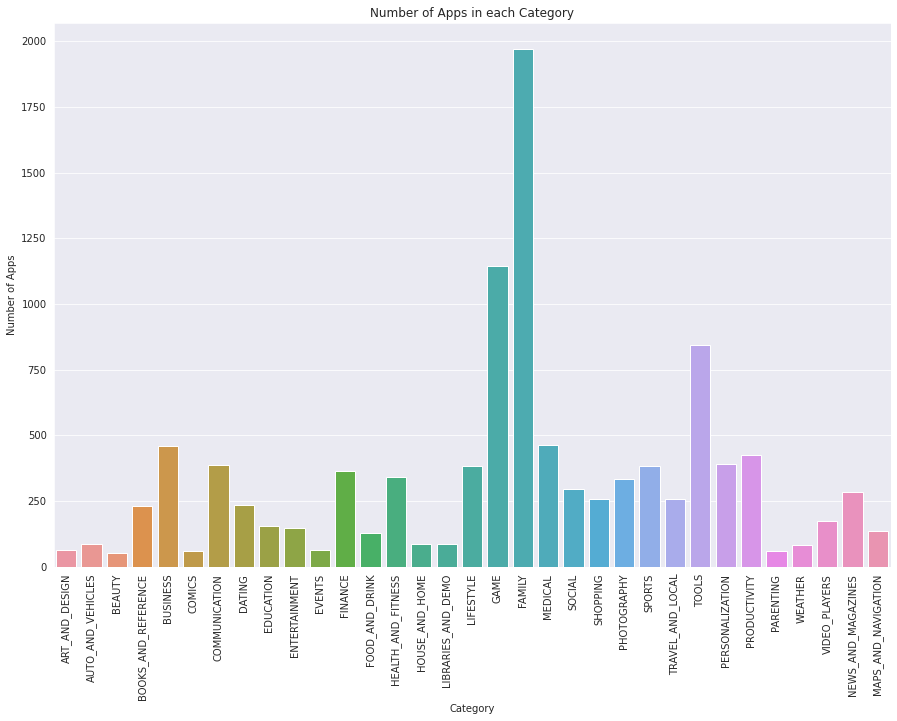

In [166]:

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps in each Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [ ]:
# CORRELATION BETWEEN RATING AND INSTALL
print(df['Rating'].corr(df['Installs']))
print(df['Rating'].corr(df['Size']))
print(df['Rating'].corr(df['Price']))


0.055835348745672066
0.04998834029825421
-0.020835442499074625


In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.071814,0.049988,0.055835,-0.020835
Reviews,0.071814,1.000000,0.065450,0.643121,-0.009668
Size,0.049988,0.065450,1.000000,-0.003468,-0.013464
Installs,0.055835,0.643121,-0.003468,1.000000,-0.011691
Price,-0.020835,-0.009668,-0.013464,-0.011691,1.000000


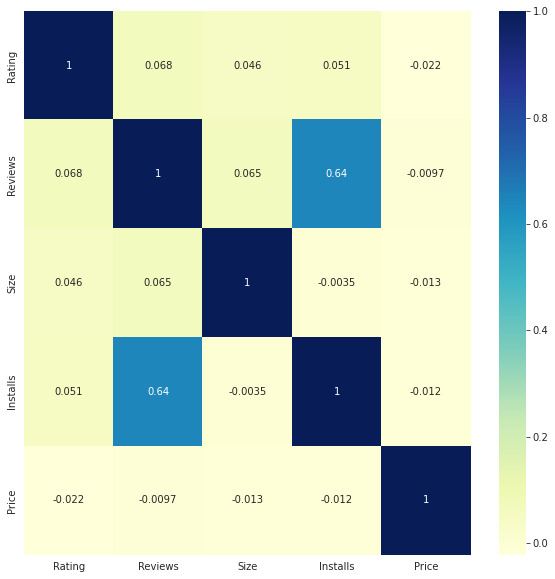

In [ ]:
plt.figure(figsize = (10,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
dfy=df.groupby(['Category'])['Rating'].mean()
dfy

Category
ART_AND_DESIGN         4.346154
AUTO_AND_VEHICLES      4.177647
BEAUTY                 4.241509
BOOKS_AND_REFERENCE    4.289610
BUSINESS               4.114130
COMICS                 4.153333
COMMUNICATION          4.149612
DATING                 3.992308
EDUCATION              4.387179
ENTERTAINMENT          4.126174
EVENTS                 4.335938
FAMILY                 4.181786
FINANCE                4.128142
FOOD_AND_DRINK         4.157480
GAME                   4.278671
HEALTH_AND_FITNESS     4.254252
HOUSE_AND_HOME         4.184091
LIBRARIES_AND_DEMO     4.160000
LIFESTYLE              4.095812
MAPS_AND_NAVIGATION    4.056204
MEDICAL                4.167387
NEWS_AND_MAGAZINES     4.126502
PARENTING              4.266667
PERSONALIZATION        4.289031
PHOTOGRAPHY            4.187164
PRODUCTIVITY           4.192217
SHOPPING               4.246154
SOCIAL                 4.236610
SPORTS                 4.202604
TOOLS                  4.054211
TRAVEL_AND_LOCAL       4.108140

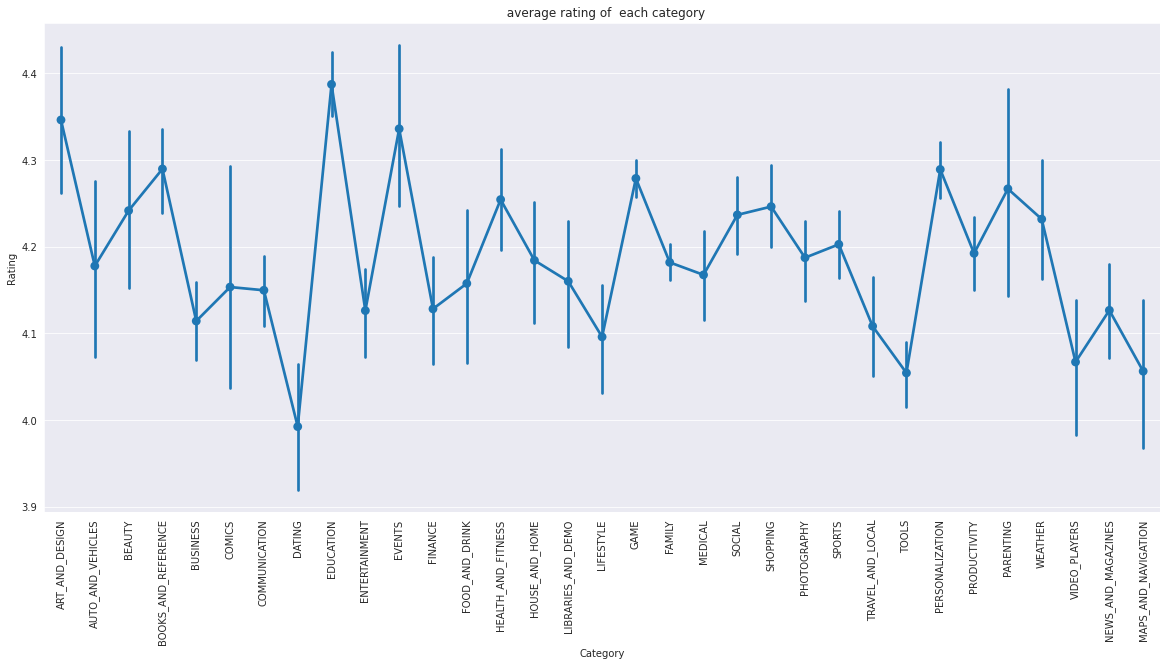

In [168]:
# plot point plot for average rating of each category

plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
plt.title("  average rating of  each category")
sns.pointplot(x = "Category", y = "Rating", data = df)

In [37]:




dft = df['Content Rating'].value_counts()
dft


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Rating')

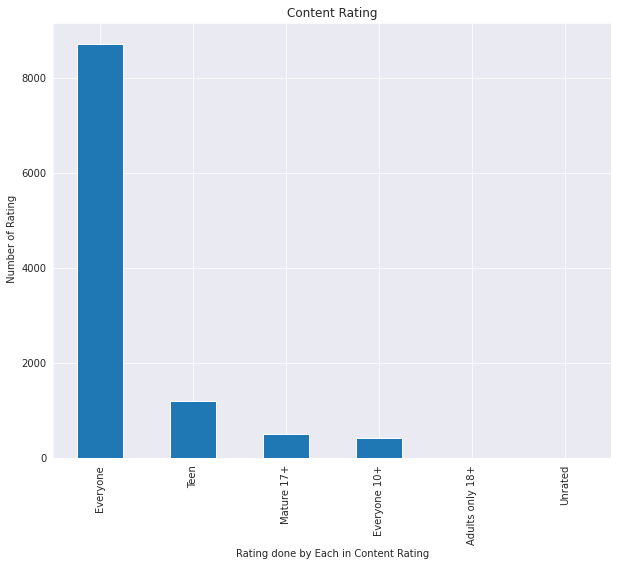

In [169]:
# plot bargraph for  content raing

plt.figure(figsize = (10,8))
dft.plot(kind="bar")
plt.ylabel(" Number of Rating")
plt.xlabel("Rating done by Each in Content Rating")
plt.title("Content Rating")

In [170]:
dfr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [181]:
dfr['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [184]:
#removal of null values in sentiment column
dfr.dropna(subset = ['Sentiment'], inplace = True)

In [183]:
dfr["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [41]:
dfr1 = dfr['Sentiment'].value_counts()
dfr1

Positive    16432
Negative     5697
Neutral      3483
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


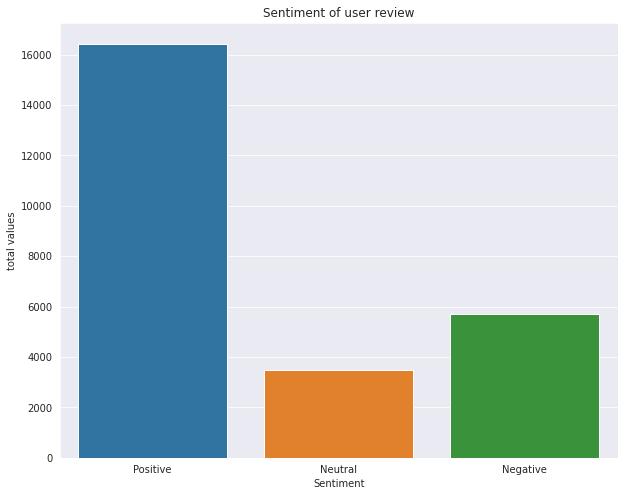

In [185]:
plt.figure(figsize=(10, 8))
sns.countplot(dfr['Sentiment'])

plt.title('Sentiment of user review')
plt.ylabel('total values')
plt.show()